In [2]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df=pd.read_excel("C:/Users/ADMIN/Documents/Cap project final.xlsx")

In [7]:
print(df)

             Date      Time    Booking ID   Booking Status   Customer ID  \
0      2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1      2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2      2024-08-23  08:56:10   "CNR849006"        Completed  "CID9202816"   
3      2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4      2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...           ...       ...           ...              ...           ...   
148734 2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
148735 2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
148736 2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
148737 2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
148738 2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Location      Drop Location  Avg VTAT  \
0        

In [8]:
print(df.head())

        Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2 2024-08-23  08:56:10   "CNR849006"        Completed  "CID9202816"   
3 2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4 2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       0.0       0.0   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Incomplete Rides Reason Booking Value  Ride Distance Driver Ratings  \
0  ...       

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148739 entries, 0 to 148738
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               148739 non-null  datetime64[ns]
 1   Time                               148739 non-null  object        
 2   Booking ID                         148739 non-null  object        
 3   Booking Status                     148739 non-null  object        
 4   Customer ID                        148739 non-null  object        
 5   Vehicle Type                       148739 non-null  object        
 6   Pickup Location                    148739 non-null  object        
 7   Drop Location                      148739 non-null  object        
 8   Avg VTAT                           148739 non-null  float64       
 9   Avg CTAT                           148739 non-null  float64       
 10  Cancelled Rides by C

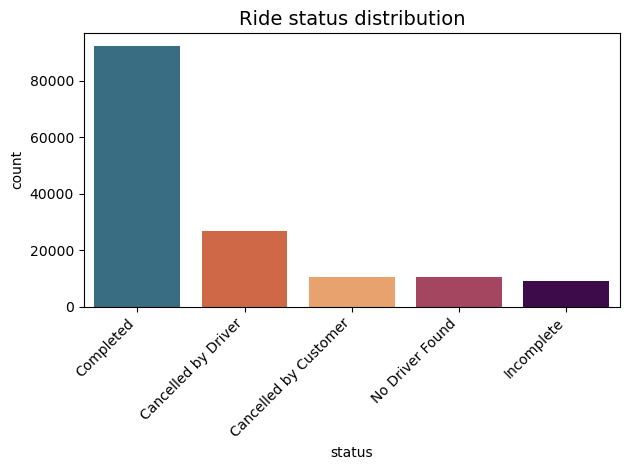

In [19]:
# visualization
# ride status distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Count booking status
status_counts = df['Booking Status'].value_counts().reset_index()
status_counts.columns = ['Booking Status', 'Count']

sns.barplot(
            x='Booking Status',
            y='Count',
            data= status_counts,
            hue='Booking Status',
            palette = ['#2c728e', '#e55c30', '#fb9f59','#b5365a','#440154']

)
plt.title("Ride status distribution", fontsize=14)
plt.xlabel('status')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()                  # Adjust layout to fit everything
plt.show()

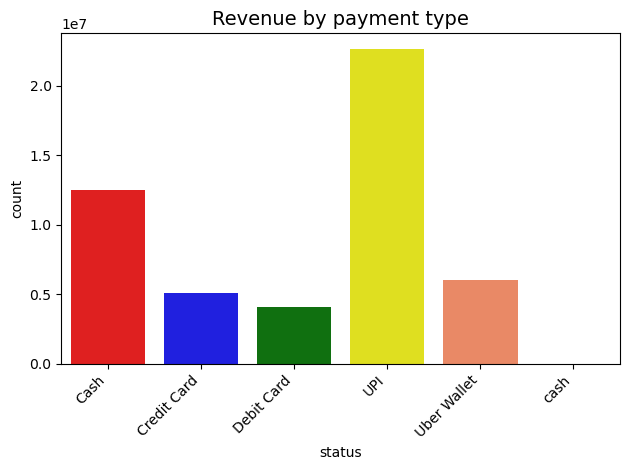

In [5]:
# REVENUE BY PAYMENT TYPE
import seaborn as sns
import matplotlib.pyplot as plt

# Count booking status
data_grouped = df.groupby('Payment Method')['Booking Value'].sum().reset_index()
data_grouped.columns=['Payment Method','Booking Value']
sns.barplot(
            x='Payment Method',
            y='Booking Value',
            data= data_grouped,
            hue='Payment Method',
            palette = ['red','blue','green','yellow','coral','pink']

)
plt.title("Revenue by payment type", fontsize=14)
plt.xlabel('status')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()                  
plt.show()

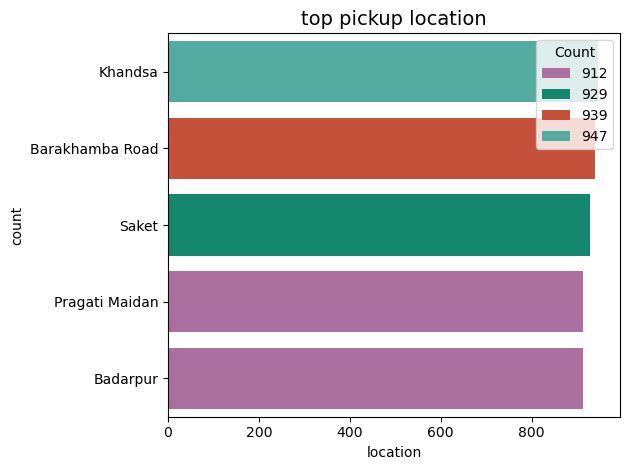

In [72]:
# Top pickup location
import seaborn as sns
import matplotlib.pyplot as plt

# Count location
Location_counts = df['Pickup Location'].value_counts().head(5).reset_index()
Location_counts.columns = ['Pickup Location', 'Count']

sns.barplot(
            x='Count',
            y='Pickup Location',
            data= Location_counts,
            hue='Count',
            palette = ['#B565A7', '#009B77', '#DD4124', '#45B8AC']

)
plt.title("top pickup location", fontsize=14)
plt.xlabel('location')
plt.ylabel('count') 
plt.tight_layout()                  
plt.show()


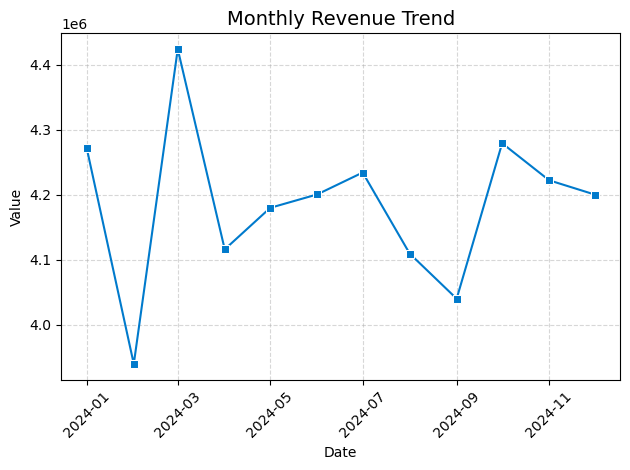

In [9]:
#MONTHLY REVENUE TREND

import seaborn as sns
import matplotlib.pyplot as plt

# Group by month and sum the values
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Booking Value'].sum().reset_index()
monthly_sales.columns = ['Date', 'Booking Value']
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()  # Convert Period to datetime


sns.lineplot(
    x='Date',
    y='Booking Value',
    data=monthly_sales,
    marker='s',
    color='#007ACC'
)
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

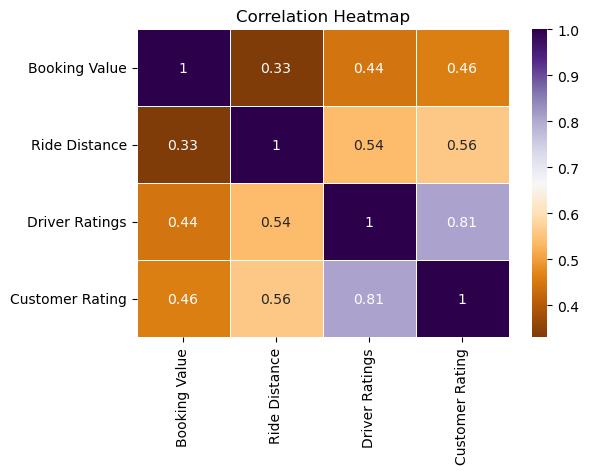

In [17]:
# 5.CORREALTION HEATMAP

plt.figure(figsize=(6,4))
corr = df[["Booking Value","Ride Distance","Driver Ratings","Customer Rating"]].corr()
sns.heatmap(corr, annot=True, cmap="PuOr",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()